# Experimentos: Expectimax en nivel 1

Este cuaderno corre 10 partidas en el mapa 1 (level1) usando el agente Expectimax.
Se guardan los resultados en una lista con el formato: [victorias, derrotas, empates].

Parámetros por defecto: profundidad = 3, límite de tiempo = 8s, debug = False.


In [4]:
# 1) Importar librerías y configuración
import sys
import os
from pathlib import Path

BASE_PATH = Path.cwd()
# Asegurar que 'src' esté en sys.path para importar el código del proyecto
src_path = str(BASE_PATH / 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)
# Asegurar que la raíz del repo esté en sys.path para importar el paquete experiments
root_path = str(BASE_PATH)
if root_path not in sys.path:
    sys.path.insert(0, root_path)

# Constantes del experimento
NUM_GAMES = 10
DEPTH = 3
TIME_LIMIT = 8
DEBUG = False
MAP_INDEX = 0

print(f"Rutas añadidas: src={src_path}, root={root_path}")
print(f"Configuración: NUM_GAMES={NUM_GAMES}, DEPTH={DEPTH}, TIME_LIMIT={TIME_LIMIT}, DEBUG={DEBUG}, MAP_INDEX={MAP_INDEX}")


Rutas añadidas: src=c:\Users\mateo\Repositorios\BattleCity-MultiAgent\BattleCity-Multi-Agent\src, root=c:\Users\mateo\Repositorios\BattleCity-MultiAgent\BattleCity-Multi-Agent
Configuración: NUM_GAMES=10, DEPTH=3, TIME_LIMIT=8, DEBUG=False, MAP_INDEX=0


In [2]:
# 2) Módulo: carga de archivos (loader)
from experiments.loader import get_map, load_game_assets

# Probar cargar el mapa
try:
    layout = get_map(BASE_PATH, MAP_INDEX)
    print(f"Mapa cargado, filas={len(layout)}")
except Exception as e:
    print("ERROR al cargar el mapa:", e)


Mapa cargado, filas=13


In [3]:
# 3) Módulo: definición del agente Expectimax (wrapper)
from experiments.agent_expectimax import make_agent

# Probar crear un agente
try:
    test_agent = make_agent(depth=DEPTH, time_limit=TIME_LIMIT, debug=DEBUG)
    print("Agent creado:", test_agent.__class__)
except Exception as e:
    print("ERROR creando agent:", e)


Agent creado: <class 'src.agents.expectimax.ExpectimaxAgent'>


In [4]:
# 4) Módulo: utilidades (ejecutar partida y evaluar resultado)
from experiments.utils import run_single_game, evaluate_result

# Prueba rápida: ejecutar 1 juego para validar la integración (defensivo, solo 1 tick si algo va mal)
try:
    short_agent = make_agent(depth=1, time_limit=1, debug=True)
    res = run_single_game(layout, short_agent, max_ticks=50, debug=True)
    print("Resultado prueba rápida:", res)
except Exception as e:
    print("ERROR en prueba rápida:", e)


Resultado prueba rápida: draw


In [5]:
# 5) Módulo: bucle de experimentos (10 partidas en mapa 1)
from experiments.experiments import run_experiments

results_level1_expectimax = run_experiments(num_games=NUM_GAMES, depth=DEPTH, time_limit=TIME_LIMIT, debug=DEBUG, map_index=MAP_INDEX, base_path=BASE_PATH)

print("Resultados (lista):", results_level1_expectimax)


[Expectimax] Profundidad 3: nodos expandidos = 4590
[Expectimax] Profundidad 3: nodos expandidos = 10586
[Expectimax] Profundidad 3: nodos expandidos = 10586
[Expectimax] Profundidad 3: nodos expandidos = 16719
[Expectimax] Profundidad 3: nodos expandidos = 16719
[Expectimax] Profundidad 3: nodos expandidos = 25509
[Expectimax] Profundidad 3: nodos expandidos = 25509
[Expectimax] Profundidad 3: nodos expandidos = 36903
[Expectimax] Profundidad 3: nodos expandidos = 36903
[Expectimax] Profundidad 3: nodos expandidos = 25509
[Expectimax] Profundidad 3: nodos expandidos = 25509
[Expectimax] Profundidad 3: nodos expandidos = 44503
[Expectimax] Profundidad 3: nodos expandidos = 44503
[Expectimax] Profundidad 3: nodos expandidos = 46397
[Expectimax] Profundidad 3: nodos expandidos = 46397
[Expectimax] Profundidad 3: nodos expandidos = 28606
[Expectimax] Profundidad 3: nodos expandidos = 28606
[Expectimax] Profundidad 3: nodos expandidos = 28372
[Expectimax] Profundidad 3: nodos expandidos = 

In [ ]:
# 6) Cargar y mostrar los resultados guardados de Expectimax (JSON)
import json
from pathlib import Path
res_path = BASE_PATH / 'experiments_results' / f"results_map{MAP_INDEX}_expectimax_depth{DEPTH}.json"
print('Leyendo:', res_path)
try:
    with open(res_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    # Mostrar resumen legible (si es el formato enriquecido que añadimos)
    try:
        from pprint import pprint
        pprint(data)
    except Exception:
        print(data)
except Exception as e:
    print('No se pudo leer el fichero:', e)


In [ ]:
# 7) Ejecutar experimentos con Alpha-Beta y guardar en archivo separado
import json
from pathlib import Path
from experiments.loader import get_map, load_game_assets
from experiments.utils import run_single_game, evaluate_result
from src.agents.minimax import AlphaBetaAgent

out_dir = BASE_PATH / 'experiments_results'
out_dir.mkdir(parents=True, exist_ok=True)
layout = get_map(BASE_PATH, MAP_INDEX)
# Asegurar assets cargados si es necesario
try:
    load_game_assets(BASE_PATH)
except Exception:
    pass

wins = losses = draws = 0
per_game = []
for i in range(NUM_GAMES):
    agent = AlphaBetaAgent(depth=DEPTH, tankIndex=0, time_limit=TIME_LIMIT)
    out = run_single_game(layout, agent, debug=DEBUG, return_stats=True)
    if isinstance(out, tuple) and len(out) == 2:
        result, stats = out
    else:
        result = out
        stats = None
    w,l,d = evaluate_result(result)
    wins += w; losses += l; draws += d
    rec = {'game_index': i, 'result': result}
    if stats is not None:
        rec.update(stats)
    per_game.append(rec)
    print(f'AlphaBeta Game {i+1}/{NUM_GAMES}: {result} | stats={stats}')

out_data = {
    'summary': {'wins': wins, 'losses': losses, 'draws': draws, 'num_games': NUM_GAMES},
    'per_game': per_game
}
# Agregar aggregate si hay stats
if per_game:
    durations = [g.get('duration', 0.0) for g in per_game if 'duration' in g]
    avg_nodes = [g.get('avg_nodes_per_search', 0.0) for g in per_game if 'avg_nodes_per_search' in g]
    total_nodes = sum(g.get('total_nodes', 0) for g in per_game)
    total_decisions = sum(g.get('decision_count', 0) for g in per_game)
    from statistics import mean
    out_data['aggregate'] = {
        'mean_duration_per_simulation': mean(durations) if durations else 0.0,
        'mean_avg_nodes_per_search': mean(avg_nodes) if avg_nodes else 0.0,
        'overall_total_nodes': total_nodes,
        'overall_total_decisions': total_decisions,
        'overall_avg_nodes_per_search': (total_nodes / total_decisions) if total_decisions > 0 else 0.0,
    }

fname = f"results_map{MAP_INDEX}_alphabeta_depth{DEPTH}.json"
out_path = out_dir / fname
with open(out_path, 'w', encoding='utf-8') as f:
    json.dump(out_data, f, indent=2)

print('AlphaBeta results saved to', out_path)


In [ ]:
# 8) Ejecutar experimentos con ReflexAgent y guardar en archivo separado
import json
from pathlib import Path
from experiments.loader import get_map, load_game_assets
from experiments.utils import run_single_game, evaluate_result
from src.agents.reflexAgent import ReflexTankAgent

out_dir = BASE_PATH / 'experiments_results'
out_dir.mkdir(parents=True, exist_ok=True)
layout = get_map(BASE_PATH, MAP_INDEX)
# Asegurar assets cargados si es necesario
try:
    load_game_assets(BASE_PATH)
except Exception:
    pass

wins = losses = draws = 0
per_game = []
for i in range(NUM_GAMES):
    # Alternar entre 'offensive' y 'defensive' para variar
    rtype = 'offensive' if i % 2 == 0 else 'defensive'
    agent = ReflexTankAgent(script_type=rtype)
    out = run_single_game(layout, agent, debug=DEBUG, return_stats=True)
    if isinstance(out, tuple) and len(out) == 2:
        result, stats = out
    else:
        result = out
        stats = None
    w,l,d = evaluate_result(result)
    wins += w; losses += l; draws += d
    rec = {'game_index': i, 'result': result, 'script_type': rtype}
    if stats is not None:
        rec.update(stats)
    per_game.append(rec)
    print(f'Reflex Game {i+1}/{NUM_GAMES} ({rtype}): {result} | stats={stats}')

out_data = {
    'summary': {'wins': wins, 'losses': losses, 'draws': draws, 'num_games': NUM_GAMES},
    'per_game': per_game
}
# Agregar aggregate si hay stats
if per_game:
    durations = [g.get('duration', 0.0) for g in per_game if 'duration' in g]
    avg_nodes = [g.get('avg_nodes_per_search', 0.0) for g in per_game if 'avg_nodes_per_search' in g]
    total_nodes = sum(g.get('total_nodes', 0) for g in per_game)
    total_decisions = sum(g.get('decision_count', 0) for g in per_game)
    from statistics import mean
    out_data['aggregate'] = {
        'mean_duration_per_simulation': mean(durations) if durations else 0.0,
        'mean_avg_nodes_per_search': mean(avg_nodes) if avg_nodes else 0.0,
        'overall_total_nodes': total_nodes,
        'overall_total_decisions': total_decisions,
        'overall_avg_nodes_per_search': (total_nodes / total_decisions) if total_decisions > 0 else 0.0,
    }

fname = f"results_map{MAP_INDEX}_reflex_depth{DEPTH}.json"
out_path = out_dir / fname
with open(out_path, 'w', encoding='utf-8') as f:
    json.dump(out_data, f, indent=2)

print('Reflex results saved to', out_path)


Medianas por algoritmo:
Expectimax: duration_median=112.26877450942993, nodes_median=11332.587272727273
AlphaBeta: duration_median=258.7980499267578, nodes_median=0.0
Reflex: duration_median=0.05353128910064697, nodes_median=0.0


C:\Users\mateo\AppData\Local\Temp\ipykernel_48056\389431457.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(dur_lists, labels=labels, showmeans=True)
C:\Users\mateo\AppData\Local\Temp\ipykernel_48056\389431457.py:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(node_lists, labels=labels, showmeans=True)


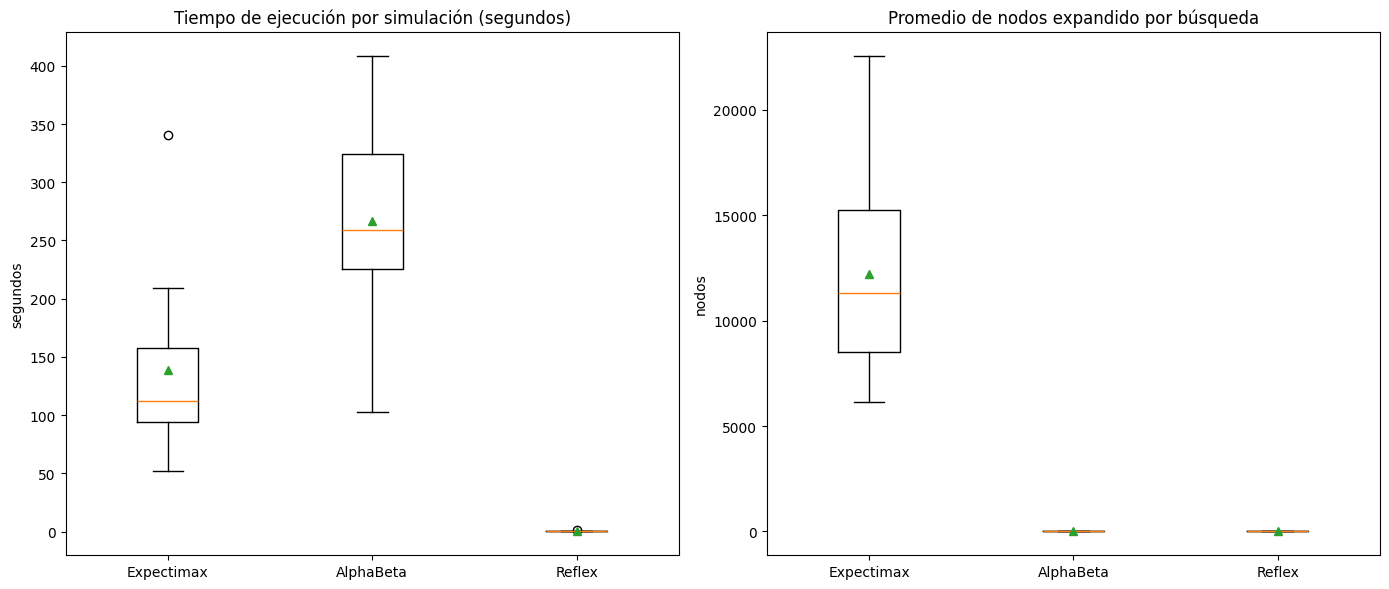

In [ ]:
# 9) Cargar resultados de los tres agentes y graficar diagramas de caja (duración y nodos)
import json
from pathlib import Path
import matplotlib.pyplot as plt
from statistics import median

res_dir = BASE_PATH / 'experiments_results'
files = {
    'Expectimax': res_dir / f"results_map{MAP_INDEX}_expectimax_depth{DEPTH}.json",
    'AlphaBeta': res_dir / f"results_map{MAP_INDEX}_alphabeta_depth{DEPTH}.json",
    'Reflex': res_dir / f"results_map{MAP_INDEX}_reflex_depth{DEPTH}.json",
}
data = {}
for name, path in files.items():
    durations = []
    avg_nodes = []
    try:
        with open(path, 'r', encoding='utf-8') as f:
            d = json.load(f)
        per = d.get('per_game', [])
        for g in per:
            # duration
            dur = g.get('duration', None)
            if dur is not None:
                durations.append(float(dur))
            # average nodes per search: prefer avg_nodes_per_search, else compute from nodes_per_decision
            an = g.get('avg_nodes_per_search', None)
            if an is None:
                npd = g.get('nodes_per_decision', [])
                if npd:
                    try:
                        an = sum(npd) / len(npd)
                    except Exception:
                        an = None
            if an is not None:
                avg_nodes.append(float(an))
    except FileNotFoundError:
        print(f'File not found for {name}:', path)
    except Exception as e:
        print(f'Error reading {path}:', e)
    data[name] = {'durations': durations, 'avg_nodes': avg_nodes}

# Mostrar medianas por algoritmo
print('Medianas por algoritmo:')
for name in ('Expectimax','AlphaBeta','Reflex'):
    dlist = data[name]['durations']
    nlist = data[name]['avg_nodes']
    print(f'{name}: duration_median={median(dlist) if dlist else 'N/A'}, nodes_median={median(nlist) if nlist else 'N/A'}')

# Preparar listas para boxplots (si una lista está vacía, se usará [0] para permitir trazado)
labels = []
dur_lists = []
node_lists = []
for name in ('Expectimax','AlphaBeta','Reflex'):
    labels.append(name)
    dl = data[name]['durations'] or [0.0]
    nl = data[name]['avg_nodes'] or [0.0]
    dur_lists.append(dl)
    node_lists.append(nl)

# Dibujar figure con dos boxplots lado a lado
fig, axes = plt.subplots(1,2, figsize=(14,6))
axes[0].boxplot(dur_lists, labels=labels, showmeans=True)
axes[0].set_title('Tiempo de ejecución por simulación (segundos)')
axes[0].set_ylabel('segundos')

axes[1].boxplot(node_lists, labels=labels, showmeans=True)
axes[1].set_title('Promedio de nodos expandido por búsqueda')
axes[1].set_ylabel('nodos')

plt.tight_layout()
# Guardar figura en experiments_results
img_fname = f"boxplots_map{MAP_INDEX}_depth{DEPTH}.png"
img_path = res_dir / img_fname
try:
    fig.savefig(img_path, dpi=200)
    print('Figura guardada en', img_path)
except Exception as e:
    print('No se pudo guardar la figura:', e)
plt.show()
